In [177]:
print("hello")

hello


In [178]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [179]:
data = pd.read_csv('bank.csv')
le = LabelEncoder()
data["pep"] = le.fit_transform(data["pep"])
data["sex"] = le.fit_transform(data["sex"])
data["region"] = le.fit_transform(data["region"])
data["married"] = le.fit_transform(data["married"])
data["car"] = le.fit_transform(data["car"])
data["save_act"] = le.fit_transform(data["save_act"])
data["current_act"] = le.fit_transform(data["current_act"])
data["mortgage"] = le.fit_transform(data["mortgage"])
data = data.dropna()
x = data.drop(["id","pep"],axis=1)
y = data["pep"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

In [180]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.875


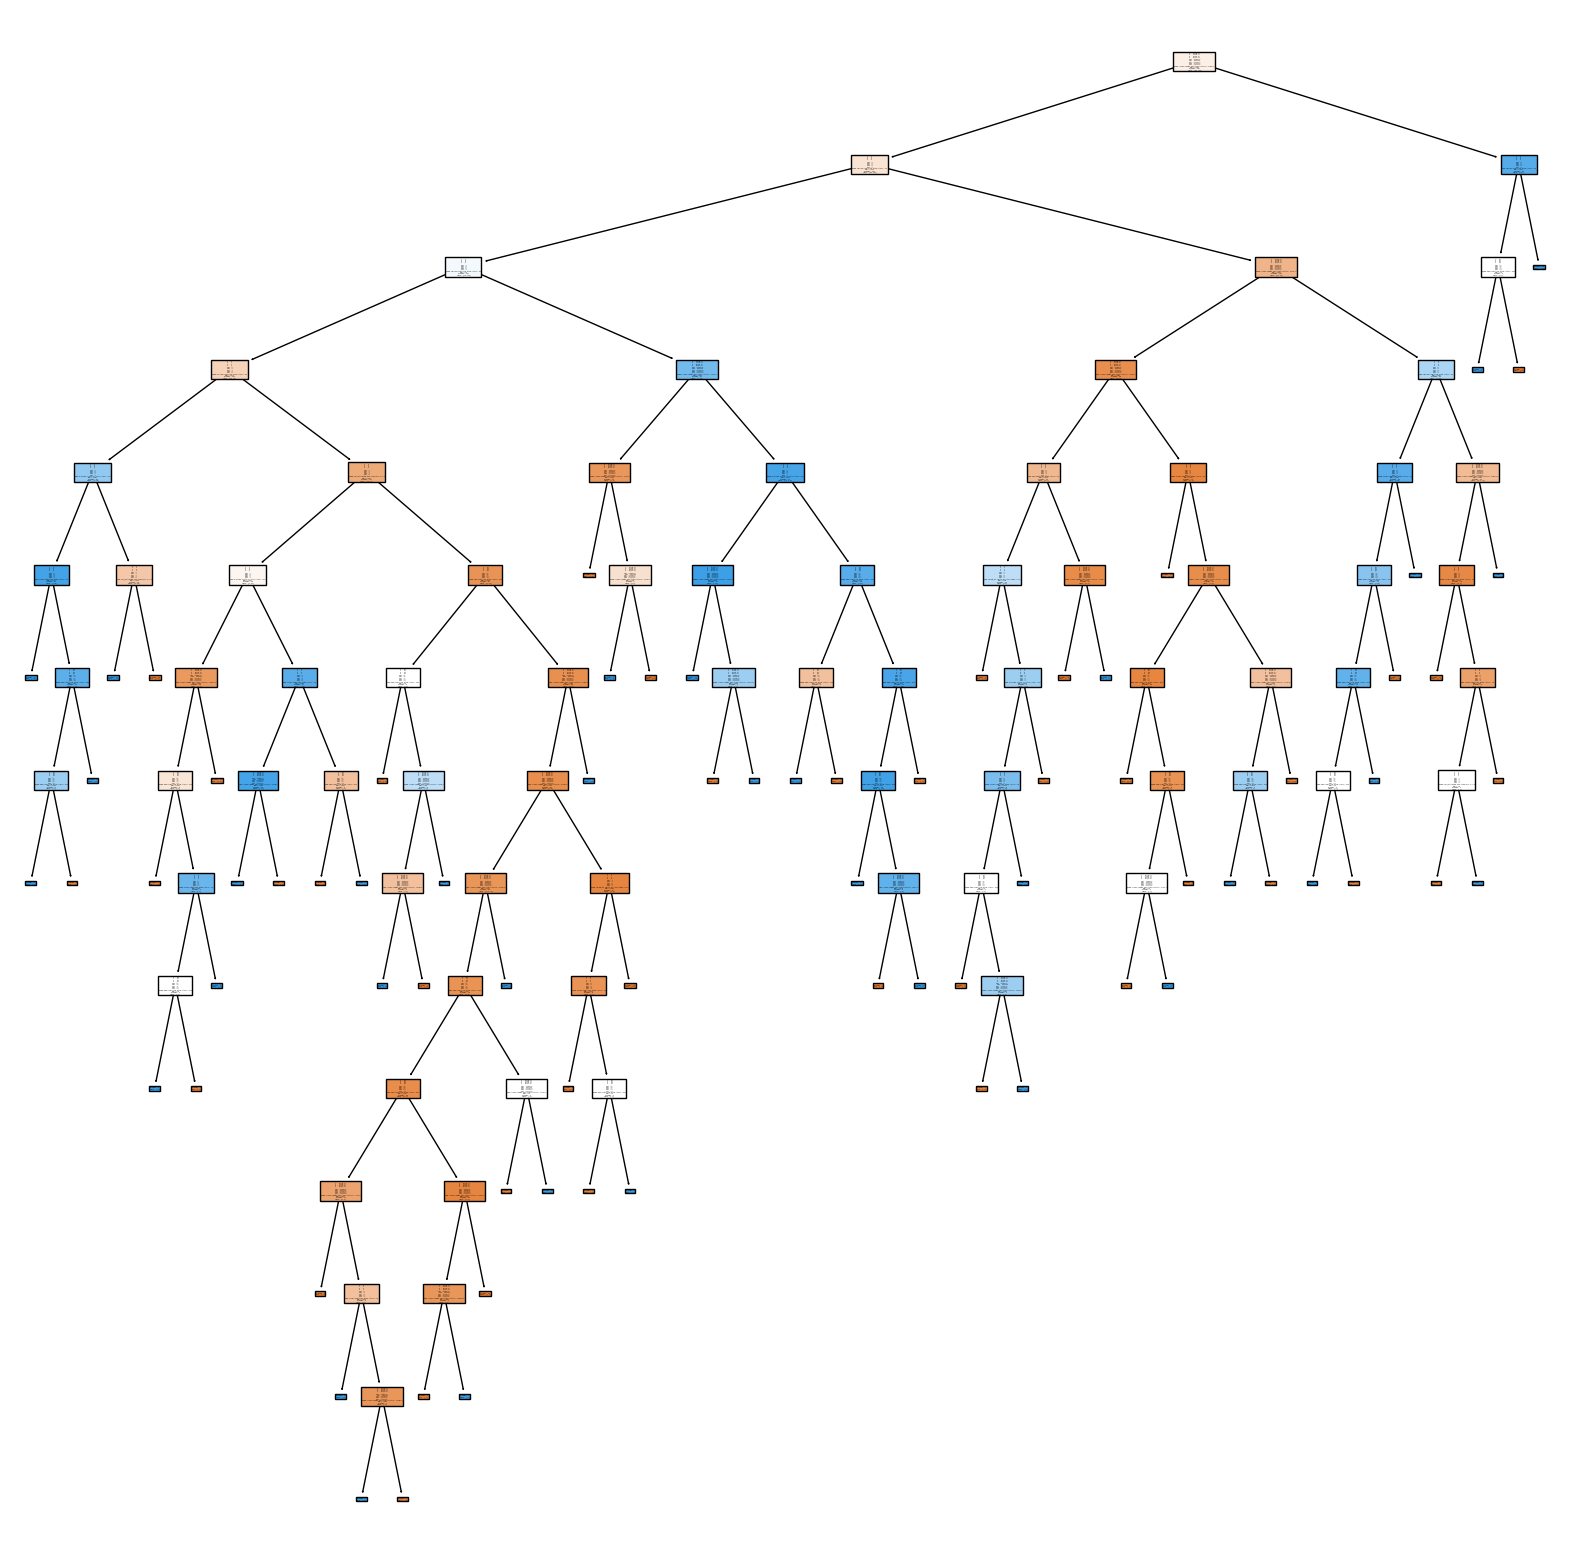

In [181]:
plt.figure(figsize=(20,20))  # Set the size of the figure
plot_tree(tree, filled=True,feature_names=[x["age"],x["sex"],x["region"],x["income"],x["married"],x["children"],x["car"],x["save_act"],x["current_act"],x["mortgage"]])
plt.show()

In [182]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train, y_train)

accuracies = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
print(accuracies)
print(max(accuracies), accuracies.index(max(accuracies)))

[0.475, 0.5666666666666667, 0.5333333333333333, 0.575, 0.5416666666666666, 0.5833333333333334, 0.5916666666666667, 0.5666666666666667, 0.5666666666666667, 0.6083333333333333, 0.6, 0.625, 0.625, 0.6416666666666667, 0.625, 0.6166666666666667, 0.6166666666666667, 0.6083333333333333, 0.6166666666666667, 0.6]
0.6416666666666667 13


In [183]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.675


In [184]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6


In [185]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5833333333333334


In [186]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6583333333333333


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
